In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)

In [3]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter
from scipy.stats import linregress

In [4]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

In [24]:
def mean_v_from_file(file):
    v_x = fits.open(file)[0].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

def mean_vy_from_file(file):
    v_x = fits.open(file)[1].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

<h2 style = "color:green">31. 01. 2025</h2>

<h3>Tracking on $B_z$, cadence = 30s, FWHM = 600km</h3>

<h3>$\log\tau = -1$</h3>

In [5]:
Vxm1 = fits.open("Velocities_TAU_0_1.fits")[1].data # Vy from Velocities.fits as originally thought
Vym1 = fits.open("Velocities_TAU_0_1.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm1 = Vxm1[::3]
Vym1 = Vym1[::3]
Vxm1 = Vxm1.transpose(0, 2, 1)
Vym1 = Vym1.transpose(0, 2, 1)

In [6]:
Vxm1_mean = temporal_avg(Vxm1, 0, 90)
Vxm1_mean = Vxm1_mean/1E5
Vym1_mean = temporal_avg(Vym1, 0, 90)
Vym1_mean = Vym1_mean/1E5

In [7]:
Vxm1_filtered600 = gaussian_filter(Vxm1_mean, 22.5, mode = "wrap")
Vym1_filtered600 = gaussian_filter(Vym1_mean, 22.5, mode = "wrap")

In [8]:
Vx_Bz1 = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum1Bz_tracked.fits")[0].data
Vy_Bz1 = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum1Bz_tracked.fits")[1].data

In [9]:
Vx_Bz1_mean = temporal_avg(Vx_Bz1, 0, 90)
Vy_Bz1_mean = temporal_avg(Vy_Bz1, 0, 90)

In [32]:
Vx_Bz1_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum1Bz_tracked.fits")
Vy_Bz1_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum1Bz_tracked.fits")

In [10]:
Rxm1_reg = pearsonr((Vxm1[0]/1E5).flatten(), Vx_Bz1[0].flatten())
print(Rxm1_reg)

PearsonRResult(statistic=0.030277596927515645, pvalue=0.0)


In [11]:
Rym1_reg = pearsonr((Vym1[0]/1E5).flatten(), Vy_Bz1[0].flatten())
print(Rym1_reg)

PearsonRResult(statistic=0.024654765113383326, pvalue=6.5263590796e-314)


In [12]:
Rxm1_tav = pearsonr(Vxm1_mean.flatten(), Vx_Bz1_mean.flatten())
print(Rxm1_tav)

PearsonRResult(statistic=0.6322721829746781, pvalue=0.0)


In [13]:
Rym1_tav = pearsonr(Vym1_mean.flatten(), Vy_Bz1_mean.flatten())
print(Rym1_tav)

PearsonRResult(statistic=0.6195645535734575, pvalue=0.0)


<h3 style = "color:red">Correction</h3>

In [34]:
RRRRx1Bz = pearsonr(Vxm1_filtered600.flatten(), Vx_Bz1_cor.flatten())
print(RRRRx1Bz)
RRRRy1Bz = pearsonr(Vym1_filtered600.flatten(), Vy_Bz1_cor.flatten())
print(RRRRy1Bz)

PearsonRResult(statistic=0.9023832549003679, pvalue=0.0)
PearsonRResult(statistic=0.9053670003345784, pvalue=0.0)


In [14]:
Rxm1_fil = pearsonr(Vxm1_filtered600.flatten(), Vx_Bz1_mean.flatten())
print(Rxm1_fil)

PearsonRResult(statistic=0.7106097784148055, pvalue=0.0)


In [15]:
Rym1_fil = pearsonr(Vym1_filtered600.flatten(), Vy_Bz1_mean.flatten())
print(Rym1_fil)

PearsonRResult(statistic=0.6998689689649392, pvalue=0.0)


/tmp/ipykernel_8207/518272568.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_8207/518272568.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Bz_vs_SIM30_logtaum1.png", dpi = 100)


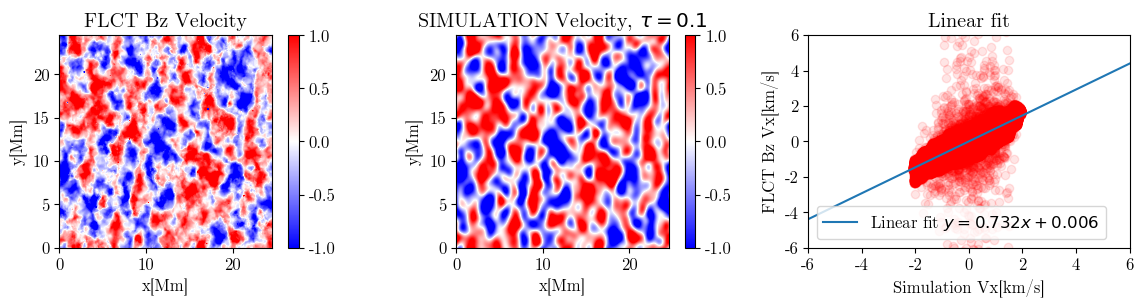

In [17]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(131)                                      # atmos[1] temp
plt.title("FLCT Bz Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Bz1_cor[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(132)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.1$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm1_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(133)
plt.scatter(Vxm1_filtered600[:,:].flatten(), Vx_Bz1_cor[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Bz Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m, b, *_ = linregress(Vxm1_filtered600.flatten(), Vx_Bz1_cor.flatten())
plt.axline(xy1=(0, b), slope=m, label=f'Linear fit $y = {m:.3f}x {b:+.3f}$')
plt.legend()
plt.xlim([-6,6])
plt.ylim([-6,6])
fig.tight_layout()
plt.savefig("FLCT_Bz_vs_SIM30_logtaum1.png", dpi = 100)

<h3>$\log\tau = -2$</h3>

In [18]:
Vxm2 = fits.open("Velocities_TAU_0_010.fits")[1].data # Vy from Velocities.fits as originally thought
Vym2 = fits.open("Velocities_TAU_0_010.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm2 = Vxm2[::3]
Vym2 = Vym2[::3]
Vxm2 = Vxm2.transpose(0, 2, 1)
Vym2 = Vym2.transpose(0, 2, 1)

In [19]:
Vxm2_mean = temporal_avg(Vxm2, 0, 90)
Vxm2_mean = Vxm2_mean/1E5
Vym2_mean = temporal_avg(Vym2, 0, 90)
Vym2_mean = Vym2_mean/1E5

In [20]:
Vxm2_filtered600 = gaussian_filter(Vxm2_mean, 22.5, mode = "wrap")
Vym2_filtered600 = gaussian_filter(Vym2_mean, 22.5, mode = "wrap")

In [21]:
Vx_Bz2 = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum2Bz_tracked.fits")[0].data
Vy_Bz2 = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum2Bz_tracked.fits")[1].data

In [22]:
Vx_Bz2_mean = temporal_avg(Vx_Bz2, 0, 90)
Vy_Bz2_mean = temporal_avg(Vy_Bz2, 0, 90)

In [35]:
Vx_Bz2_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum2Bz_tracked.fits")
Vy_Bz2_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum2Bz_tracked.fits")

In [23]:
Rxm2_reg = pearsonr((Vxm2[0]/1E5).flatten(), Vx_Bz2[0].flatten())
print(Rxm2_reg)

PearsonRResult(statistic=0.5010794065009545, pvalue=0.0)


In [25]:
Rym2_reg = pearsonr((Vym2[0]/1E5).flatten(), Vy_Bz2[0].flatten())
print(Rym2_reg)

PearsonRResult(statistic=0.4765439936567883, pvalue=0.0)


In [26]:
Rxm2_tav = pearsonr(Vxm2_mean.flatten(), Vx_Bz2_mean.flatten())
print(Rxm2_tav)

PearsonRResult(statistic=0.5430825606448796, pvalue=0.0)


In [27]:
Rym2_tav = pearsonr(Vym2_mean.flatten(), Vy_Bz2_mean.flatten())
print(Rym2_tav)

PearsonRResult(statistic=0.6199984897257235, pvalue=0.0)


<h3 style = "color:red">Corrected</h3>

In [36]:
RRRRx2Bz = pearsonr(Vxm2_filtered600.flatten(), Vx_Bz2_cor.flatten())
print(RRRRx2Bz)
RRRRy2Bz = pearsonr(Vym2_filtered600.flatten(), Vy_Bz2_cor.flatten())
print(RRRRy2Bz)

PearsonRResult(statistic=0.8745963823981762, pvalue=0.0)
PearsonRResult(statistic=0.8810707710614484, pvalue=0.0)


In [28]:
Rxm2_fil = pearsonr(Vxm2_filtered600.flatten(), Vx_Bz2_mean.flatten())
print(Rxm2_fil)

PearsonRResult(statistic=0.6001362179693506, pvalue=0.0)


In [29]:
Rym2_fil = pearsonr(Vym2_filtered600.flatten(), Vy_Bz2_mean.flatten())
print(Rym2_fil)

PearsonRResult(statistic=0.692181602109491, pvalue=0.0)


/tmp/ipykernel_8207/195918610.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_8207/195918610.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Bz_vs_SIM30_logtaum2.png", dpi = 100)
/home/mistflow/anaconda3/envs/flct/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


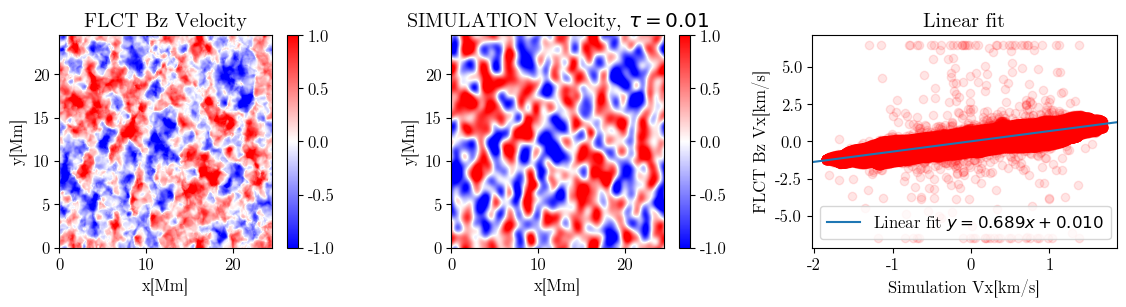

In [37]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(131)                                      # atmos[1] temp
plt.title("FLCT Bz Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Bz2_cor[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(132)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.01$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm2_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(133)
plt.scatter(Vxm2_filtered600[:,:].flatten(), Vx_Bz2_cor[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Bz Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m2, b2, *_ = linregress(Vxm2_filtered600.flatten(), Vx_Bz2_cor.flatten())
plt.axline(xy1=(0, b2), slope=m2, label=f'Linear fit $y = {m2:.3f}x {b2:+.3f}$')
plt.legend()
#plt.xlim([-5,5])
#plt.ylim([-5,5])
fig.tight_layout()
plt.savefig("FLCT_Bz_vs_SIM30_logtaum2.png", dpi = 100)

<h3>$\log\tau = -3$</h3>

In [38]:
Vxm3 = fits.open("Velocities_TAU_0_001.fits")[1].data # Vy from Velocities.fits as originally thought
Vym3 = fits.open("Velocities_TAU_0_001.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm3 = Vxm3[::3]
Vym3 = Vym3[::3]
Vxm3 = Vxm3.transpose(0, 2, 1)
Vym3 = Vym3.transpose(0, 2, 1)

In [39]:
Vxm3_mean = temporal_avg(Vxm3, 0, 90)
Vxm3_mean = Vxm3_mean/1E5
Vym3_mean = temporal_avg(Vym3, 0, 90)
Vym3_mean = Vym3_mean/1E5

In [40]:
Vxm3_filtered600 = gaussian_filter(Vxm3_mean, 22.5, mode = "wrap")
Vym3_filtered600 = gaussian_filter(Vym3_mean, 22.5, mode = "wrap")

In [42]:
Vx_Bz3 = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum3Bz_tracked.fits")[0].data
Vy_Bz3 = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum3Bz_tracked.fits")[1].data

In [43]:
Vx_Bz3_mean = temporal_avg(Vx_Bz3, 0, 90)
Vy_Bz3_mean = temporal_avg(Vy_Bz3, 0, 90)

In [44]:
Vx_Bz3_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum3Bz_tracked.fits")
Vy_Bz3_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum3Bz_tracked.fits")

In [45]:
Rxm3_reg = pearsonr((Vxm3[0]/1E5).flatten(), Vx_Bz3[0].flatten())
print(Rxm3_reg)

PearsonRResult(statistic=0.47106428450248894, pvalue=0.0)


In [46]:
Rym3_reg = pearsonr((Vym3[0]/1E5).flatten(), Vy_Bz3[0].flatten())
print(Rym3_reg)

PearsonRResult(statistic=0.4922118679313476, pvalue=0.0)


In [47]:
Rxm3_tav = pearsonr(Vxm3_mean.flatten(), Vx_Bz3_mean.flatten())
print(Rxm3_tav)

PearsonRResult(statistic=0.7733433195045247, pvalue=0.0)


In [48]:
Rym3_tav = pearsonr(Vym3_mean.flatten(), Vy_Bz3_mean.flatten())
print(Rym3_tav)

PearsonRResult(statistic=0.7664364870253211, pvalue=0.0)


<h3 style = "color:red">Corrected</h3>

In [49]:
RRRRx3Bz = pearsonr(Vxm3_filtered600.flatten(), Vx_Bz3_cor.flatten())
print(RRRRx3Bz)
RRRRy3Bz = pearsonr(Vym3_filtered600.flatten(), Vy_Bz3_cor.flatten())
print(RRRRy3Bz)

PearsonRResult(statistic=0.8601039747533874, pvalue=0.0)
PearsonRResult(statistic=0.8456582903682562, pvalue=0.0)


In [50]:
Rxm3_fil = pearsonr(Vxm3_filtered600.flatten(), Vx_Bz3_mean.flatten())
print(Rxm3_fil)

PearsonRResult(statistic=0.8307584566137247, pvalue=0.0)


In [51]:
Rym3_fil = pearsonr(Vym3_filtered600.flatten(), Vy_Bz3_mean.flatten())
print(Rym3_fil)

PearsonRResult(statistic=0.8373363717940713, pvalue=0.0)


/tmp/ipykernel_8207/1266028653.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_8207/1266028653.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Bz_vs_SIM30_logtaum3.png", dpi = 100)


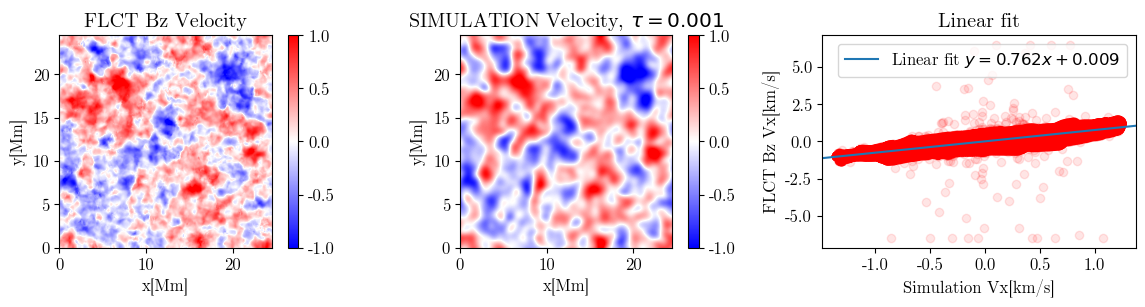

In [52]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(131)                                      # atmos[1] temp
plt.title("FLCT Bz Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Bz3_cor[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(132)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.001$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm3_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(133)
plt.scatter(Vxm3_filtered600[:,:].flatten(), Vx_Bz3_cor[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Bz Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m3, b3, *_ = linregress(Vxm3_filtered600.flatten(), Vx_Bz3_cor.flatten())
plt.axline(xy1=(0, b3), slope=m3, label=f'Linear fit $y = {m3:.3f}x {b3:+.3f}$')
plt.legend()
#plt.xlim([-5,5])
#plt.ylim([-5,5])
fig.tight_layout()
plt.savefig("FLCT_Bz_vs_SIM30_logtaum3.png", dpi = 100)

<h2 style = "color:gray">Tracking on $B_\lambda$, cadence = 30s, FWHM = 600km</h2>

<h3>$\log\tau = -1$</h3>

In [54]:
Vx_Planck1_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum1Planck_tracked.fits")
Vy_Planck1_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum1Planck_tracked.fits")

In [55]:
Vx_Planck1 = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum1Planck_tracked.fits")[0].data
Vy_Planck1 = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum1Planck_tracked.fits")[1].data

In [56]:
Vx_Planck1_mean = temporal_avg(Vx_Planck1, 0, 90)
Vy_Planck1_mean = temporal_avg(Vy_Planck1, 0, 90)

In [57]:
Rxm1_regP = pearsonr((Vxm1[0]/1E5).flatten(), Vx_Planck1[0].flatten())
print(Rxm1_regP)

PearsonRResult(statistic=0.08054902811381445, pvalue=0.0)


In [58]:
Rym1_regP = pearsonr((Vym1[0]/1E5).flatten(), Vy_Planck1[0].flatten())
print(Rym1_regP)

PearsonRResult(statistic=0.03254658972291987, pvalue=0.0)


In [59]:
Rxm1_tavP = pearsonr(Vxm1_mean.flatten(), Vx_Planck1_mean.flatten())
print(Rxm1_tavP)

PearsonRResult(statistic=0.06573719836677201, pvalue=0.0)


In [60]:
Rym1_tavP = pearsonr(Vym1_mean.flatten(), Vy_Planck1_mean.flatten())
print(Rym1_tavP)

PearsonRResult(statistic=0.22854654009240158, pvalue=0.0)


<h3 style = "color:red">Corrected</h3>

In [61]:
RRRRx1Pl = pearsonr(Vxm1_filtered600.flatten(), Vx_Planck1_cor.flatten())
print(RRRRx1Pl)
RRRRy1Pl = pearsonr(Vym1_filtered600.flatten(), Vy_Planck1_cor.flatten())
print(RRRRy1Pl)

PearsonRResult(statistic=0.7137237702417901, pvalue=0.0)
PearsonRResult(statistic=0.7292371034676058, pvalue=0.0)


In [62]:
Rxm1_filP = pearsonr(Vxm1_filtered600.flatten(), Vx_Planck1_mean.flatten())
print(Rxm1_filP)

PearsonRResult(statistic=0.07851716598443173, pvalue=0.0)


In [63]:
Rym1_filP = pearsonr(Vym1_filtered600.flatten(), Vy_Planck1_mean.flatten())
print(Rym1_filP)

PearsonRResult(statistic=0.27101089247975296, pvalue=0.0)


/tmp/ipykernel_8207/1919380525.py:56: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_8207/1919380525.py:57: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Planck_vs_SIM30_logtaum1.png", dpi = 100)


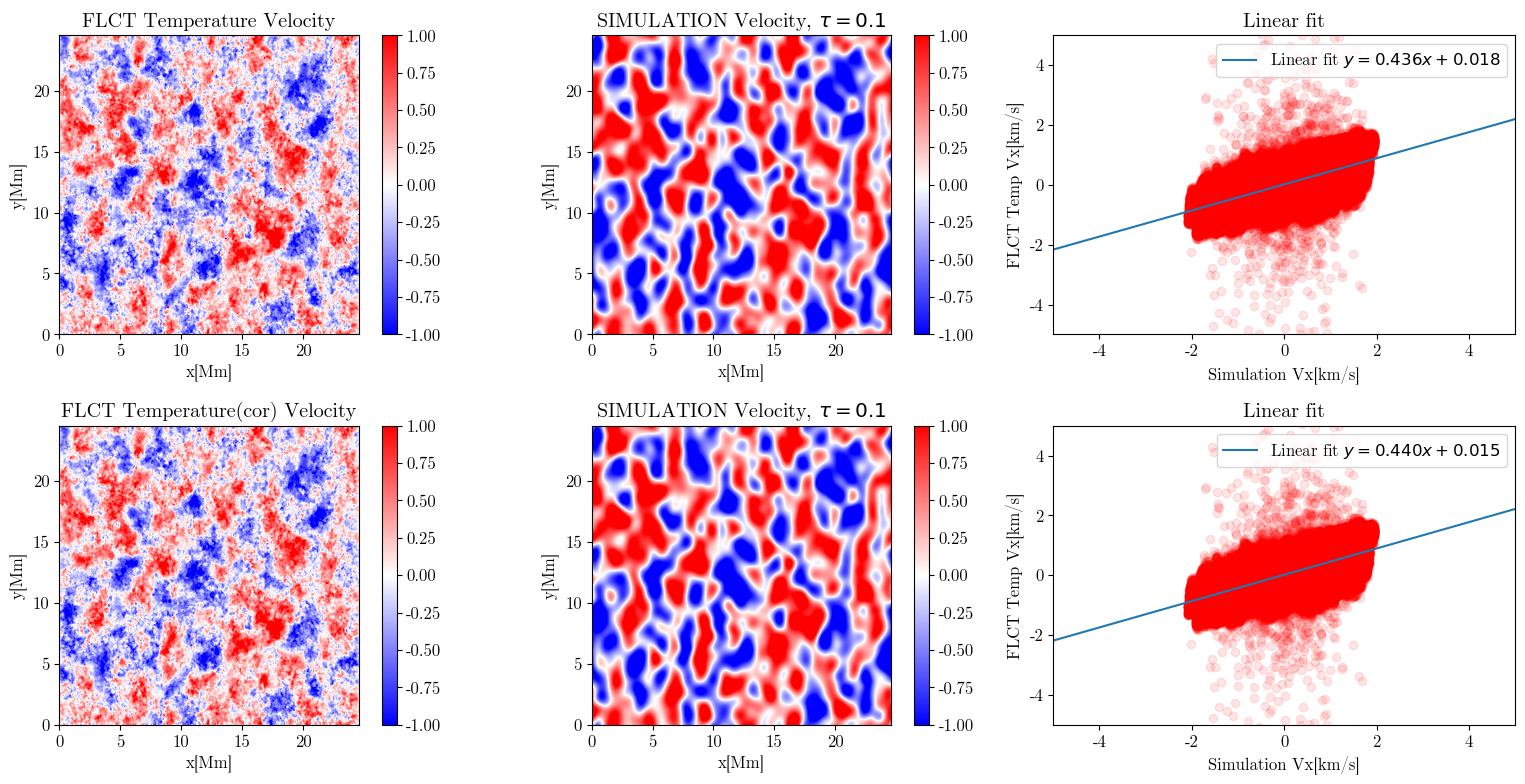

In [64]:
fig = plt.figure(figsize=[16, 8])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(231)                                      # atmos[1] temp
plt.title("FLCT Temperature Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Planck1_mean[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(232)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.1$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm1_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(233)
plt.scatter(Vxm1_filtered600[:,:].flatten(), Vx_Planck1_mean[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Planck Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m, b, *_ = linregress(Vxm1_filtered600.flatten(), Vx_Planck1_mean.flatten())
plt.axline(xy1=(0, b), slope=m, label=f'Linear fit $y = {m:.3f}x {b:+.3f}$')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])

plt.subplot(234)                                      # atmos[1] temp
plt.title("FLCT Temperature(cor) Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Planck1_cor[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(235)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.1$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm1_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(236)
plt.scatter(Vxm1_filtered600[:,:].flatten(), Vx_Planck1_cor[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Planck Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
mc, bc, *_ = linregress(Vxm1_filtered600.flatten(), Vx_Planck1_cor.flatten())
plt.axline(xy1=(0, bc), slope=mc, label=f'Linear fit $y = {mc:.3f}x {bc:+.3f}$')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])


fig.tight_layout()
plt.savefig("FLCT_Planck_vs_SIM30_logtaum1.png", dpi = 100)

<h3>$\log\tau = -2$</h3>

In [65]:
Vx_Planck2_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum2Planck_tracked.fits")
Vy_Planck2_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum2Planck_tracked.fits")

In [66]:
Vx_Planck2 = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum2Planck_tracked.fits")[0].data
Vy_Planck2 = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum2Planck_tracked.fits")[1].data

In [67]:
Vx_Planck2_mean = temporal_avg(Vx_Planck2, 0, 90)
Vy_Planck2_mean = temporal_avg(Vy_Planck2, 0, 90)

In [68]:
Rxm2_regP = pearsonr((Vxm2[0]/1E5).flatten(), Vx_Planck2[0].flatten())
print(Rxm2_regP)

PearsonRResult(statistic=-0.014116550545534639, pvalue=2.8993122695004906e-104)


In [69]:
Rym2_regP = pearsonr((Vym2[0]/1E5).flatten(), Vy_Planck2[0].flatten())
print(Rym2_regP)

PearsonRResult(statistic=-0.008181506620271084, pvalue=3.206711966641646e-36)


In [70]:
Rxm2_tavP = pearsonr(Vxm2_mean.flatten(), Vx_Planck2_mean.flatten())
print(Rxm2_tavP)

PearsonRResult(statistic=0.11699846329103199, pvalue=0.0)


In [71]:
Rym2_tavP = pearsonr(Vym2_mean.flatten(), Vy_Planck2_mean.flatten())
print(Rym2_tavP)

PearsonRResult(statistic=0.15771016711823074, pvalue=0.0)


<h3 style = "color:red">Corrected</h3>

In [72]:
RRRRx2Pl = pearsonr(Vxm2_filtered600.flatten(), Vx_Planck2_cor.flatten())
print(RRRRx2Pl)
RRRRy2Pl = pearsonr(Vym2_filtered600.flatten(), Vy_Planck2_cor.flatten())
print(RRRRy2Pl)

PearsonRResult(statistic=0.3490155490165775, pvalue=0.0)
PearsonRResult(statistic=0.3796445366578472, pvalue=0.0)


In [73]:
Rxm2_filP = pearsonr(Vxm2_filtered600.flatten(), Vx_Planck2_mean.flatten())
print(Rxm2_filP)

PearsonRResult(statistic=0.1630692095314716, pvalue=0.0)


In [74]:
Rym2_filP = pearsonr(Vym2_filtered600.flatten(), Vy_Planck2_mean.flatten())
print(Rym2_filP)

PearsonRResult(statistic=0.22109408772180159, pvalue=0.0)


/tmp/ipykernel_8207/4280630171.py:56: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_8207/4280630171.py:57: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Planck_vs_SIM30_logtaum2.png", dpi = 100)


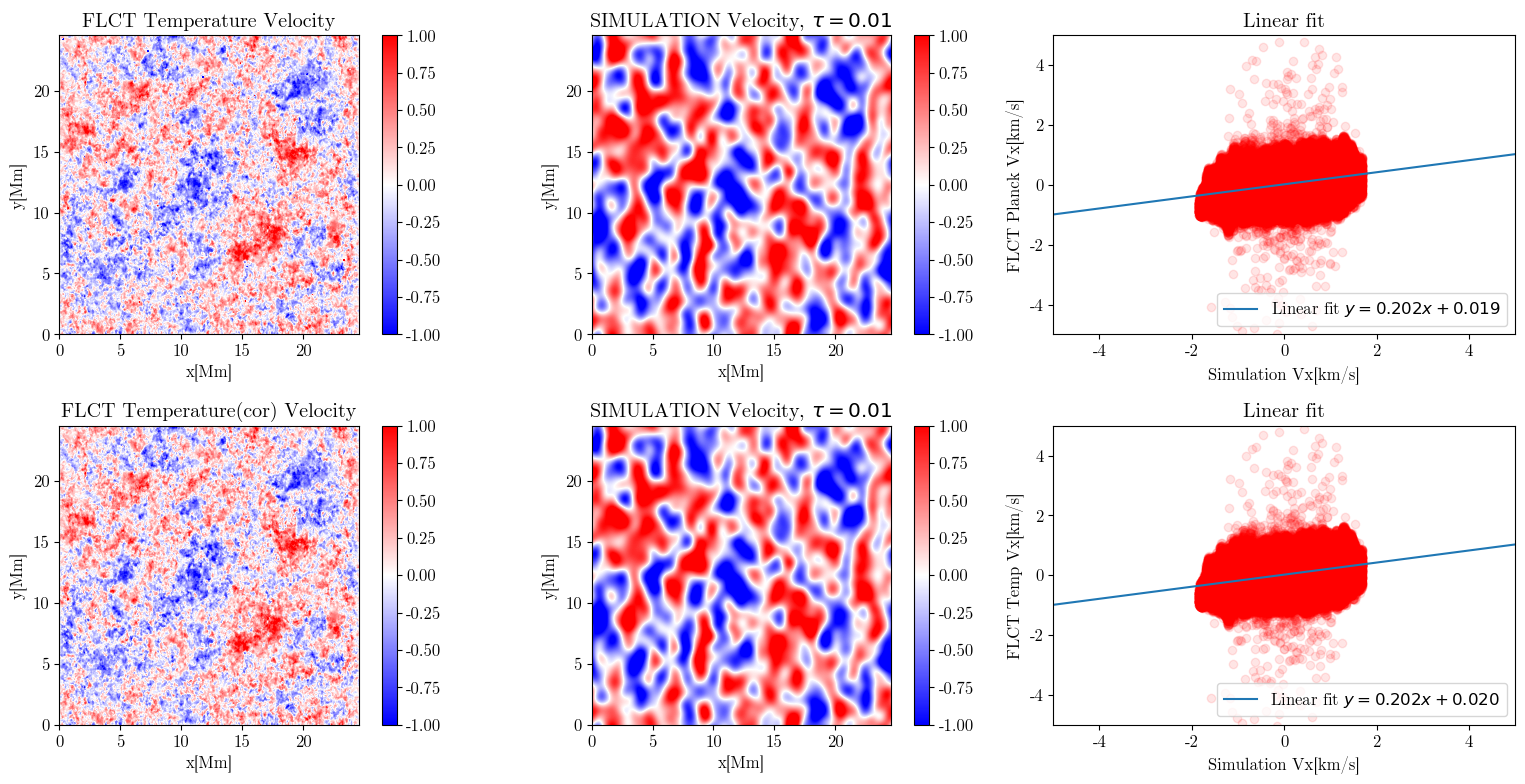

In [75]:
fig = plt.figure(figsize=[16, 8])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(231)                                      # atmos[1] temp
plt.title("FLCT Temperature Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Planck2_mean[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(232)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.01$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm2_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(233)
plt.scatter(Vxm2_filtered600[:,:].flatten(), Vx_Planck2_mean[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Planck Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m2, b2, *_ = linregress(Vxm2_filtered600.flatten(), Vx_Planck2_mean.flatten())
plt.axline(xy1=(0, b2), slope=m2, label=f'Linear fit $y = {m2:.3f}x {b2:+.3f}$')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])

plt.subplot(234)                                      # atmos[1] temp
plt.title("FLCT Temperature(cor) Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Planck2_cor[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(235)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.01$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm2_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(236)
plt.scatter(Vxm2_filtered600[:,:].flatten(), Vx_Planck2_cor[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Temp Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m2c, b2c, *_ = linregress(Vxm2_filtered600.flatten(), Vx_Planck2_cor.flatten())
plt.axline(xy1=(0, b2c), slope=m2c, label=f'Linear fit $y = {m2c:.3f}x {b2c:+.3f}$')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])


fig.tight_layout()
plt.savefig("FLCT_Planck_vs_SIM30_logtaum2.png", dpi = 100)

<h3>$\log\tau = -3$</h3>

In [76]:
Vx_Planck3_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum3Planck_tracked.fits")
Vy_Planck3_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum3Planck_tracked.fits")

In [77]:
Vx_Planck3 = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum3Planck_tracked.fits")[0].data
Vy_Planck3 = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_logTaum3Planck_tracked.fits")[1].data

In [78]:
Vx_Planck3_mean = temporal_avg(Vx_Planck3, 0, 90)
Vy_Planck3_mean = temporal_avg(Vy_Planck3, 0, 90)

In [79]:
Rxm3_regP = pearsonr((Vxm3[0]/1E5).flatten(), Vx_Planck3[0].flatten())
print(Rxm3_regP)

PearsonRResult(statistic=-0.03708021806129917, pvalue=0.0)


In [80]:
Rym3_regP = pearsonr((Vym3[0]/1E5).flatten(), Vy_Planck3[0].flatten())
print(Rym3_regP)

PearsonRResult(statistic=-0.03159186000915937, pvalue=0.0)


In [81]:
Rxm3_tavP = pearsonr(Vxm3_mean.flatten(), Vx_Planck3_mean.flatten())
print(Rxm3_tavP)

PearsonRResult(statistic=-0.020635484726971638, pvalue=1.5803827671182356e-220)


In [82]:
Rym3_tavP = pearsonr(Vym3_mean.flatten(), Vy_Planck3_mean.flatten())
print(Rym3_tavP)

PearsonRResult(statistic=-0.0073248991657487664, pvalue=2.2848812050211152e-29)


<h3 style = "color:red">Corrected</h3>

In [84]:
RRRRx3Pl = pearsonr(Vxm3_filtered600.flatten(), Vx_Planck3_cor.flatten())
print(RRRRx3Pl)
RRRRy3Pl = pearsonr(Vym3_filtered600.flatten(), Vy_Planck3_cor.flatten())
print(RRRRy3Pl)

PearsonRResult(statistic=-0.07670333746540037, pvalue=0.0)
PearsonRResult(statistic=-0.0797679491062633, pvalue=0.0)


In [85]:
Rxm3_filP = pearsonr(Vxm3_filtered600.flatten(), Vx_Planck3_mean.flatten())
print(Rxm3_filP)

PearsonRResult(statistic=-0.014333079784711692, pvalue=1.9912545007990762e-107)


In [86]:
Rym3_filP = pearsonr(Vym3_filtered600.flatten(), Vy_Planck3_mean.flatten())
print(Rym3_filP)

PearsonRResult(statistic=-0.0055995257949943205, pvalue=7.906961445911383e-18)


/tmp/ipykernel_8207/4095417706.py:56: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
/tmp/ipykernel_8207/4095417706.py:57: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("FLCT_Planck_vs_SIM30_logtaum3.png", dpi = 100)


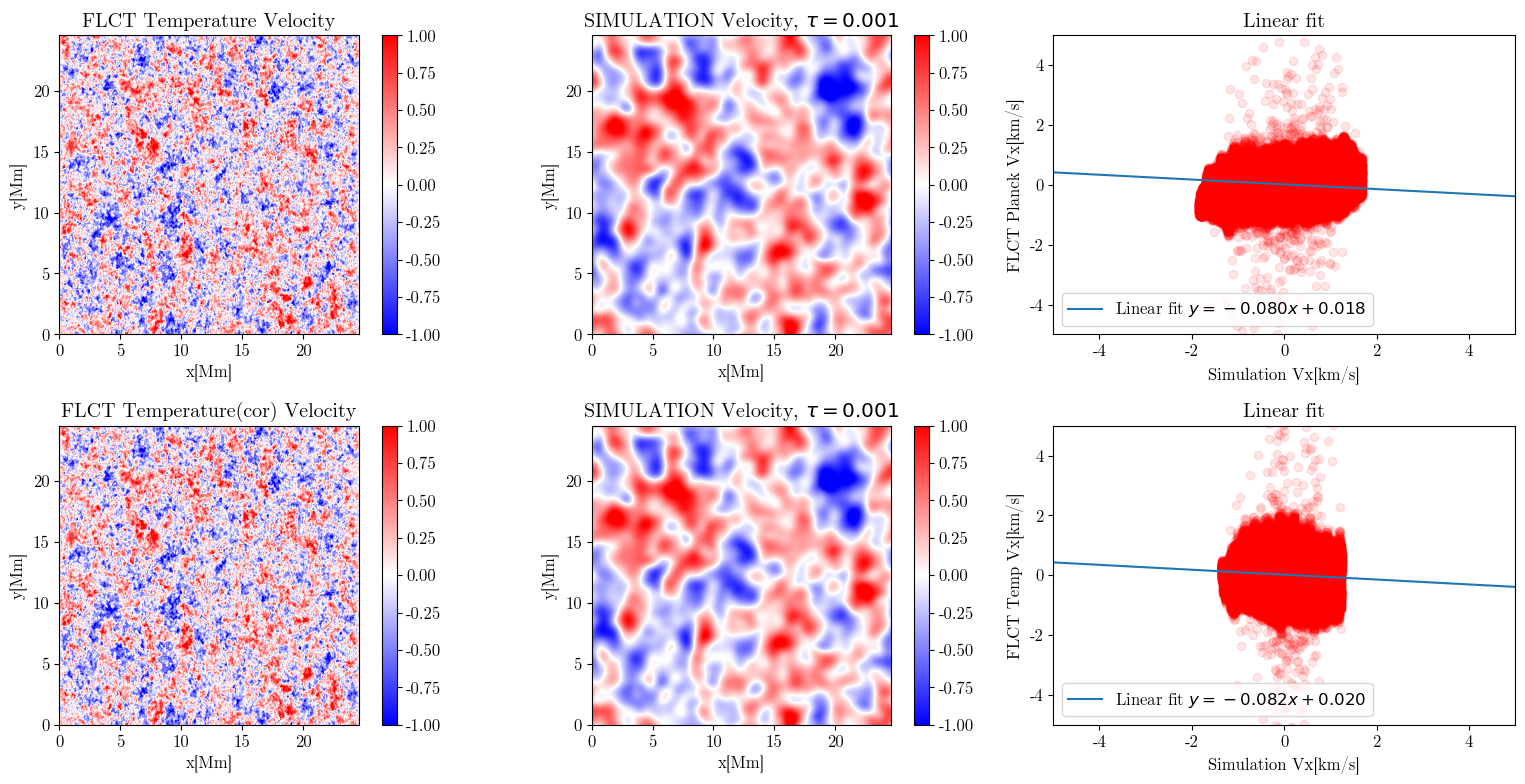

In [87]:
fig = plt.figure(figsize=[16, 8])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(231)                                      # atmos[1] temp
plt.title("FLCT Temperature Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Planck3_mean[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(232)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.001$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm3_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(233)
plt.scatter(Vxm2_filtered600[:,:].flatten(), Vx_Planck2_mean[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Planck Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m3, b3, *_ = linregress(Vxm3_filtered600.flatten(), Vx_Planck3_mean.flatten())
plt.axline(xy1=(0, b3), slope=m3, label=f'Linear fit $y = {m3:.3f}x {b3:+.3f}$')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])

plt.subplot(234)                                      # atmos[1] temp
plt.title("FLCT Temperature(cor) Velocity")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_Planck3_cor[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(235)                                      # atmos[1] temp
plt.title("SIMULATION Velocity, $\\tau=0.001$")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vxm3_filtered600[:,:], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
plt.colorbar()

plt.subplot(236)
plt.scatter(Vxm3_filtered600[:,:].flatten(), Vx_Planck3_cor[:,:].flatten(), alpha=0.10, color = 'red')
plt.title("Linear fit")  
plt.ylabel("FLCT Temp Vx[km/s]")
plt.xlabel("Simulation Vx[km/s]")
m3c, b3c, *_ = linregress(Vxm3_filtered600.flatten(), Vx_Planck3_cor.flatten())
plt.axline(xy1=(0, b3c), slope=m3c, label=f'Linear fit $y = {m3c:.3f}x {b3c:+.3f}$')
plt.legend()
plt.xlim([-5,5])
plt.ylim([-5,5])


fig.tight_layout()
plt.savefig("FLCT_Planck_vs_SIM30_logtaum3.png", dpi = 100)